In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
data = pd.read_csv('yds_data.csv')

In [73]:
data.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [74]:
data.head(10)

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,...,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
0,0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,...,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747,10.00,1.0,50.608,54.2000,38.0
1,1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,...,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747,10.00,1.0,28.800,22.0000,35.0
2,2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,...,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747,92.64,1.0,0.000,63.7216,54.4
3,3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,NaN,1.0,122.608,52.0000,42.0
4,4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,...,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747,42.64,2.0,0.000,19.0000,20.0
5,5,244.0,-145.0,-11.0,9.0,3.0,0.0,NaN,32.0,34.0,...,"45.539131, -122.651648",shot - 17,NaN,20000012,1610612747,9.00,3.0,0.000,NaN,34.0
6,6,251.0,0.0,0.0,8.0,NaN,0.0,2000-01,52.0,20.0,...,"45.539131, -122.651648",NaN,shot - 4,20000012,1610612747,8.00,3.0,0.000,112.2000,89.4
7,7,254.0,1.0,28.0,8.0,3.0,0.0,2000-01,5.0,22.0,...,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747,68.64,3.0,0.000,5.0000,22.0
8,8,265.0,-65.0,NaN,6.0,3.0,0.0,2000-01,12.0,32.0,...,"45.539131, -122.651648",shot - 36,NaN,20000012,1610612747,6.00,3.0,0.000,12.0000,32.0
9,9,294.0,-33.0,NaN,3.0,3.0,0.0,2000-01,36.0,32.0,...,"45.539131, -122.651648",shot - 44,NaN,20000012,1610612747,3.00,3.0,0.000,52.2000,NaN


In [75]:
missing_values = pd.DataFrame({'missing_values': data.isnull().sum(), 'missing_percentage' : data.isnull().sum()/data.shape[0]*100})

In [76]:
missing_values

,missing_values,missing_percentage
Unnamed: 0,0,0.000000
match_event_id,1563,5.091703
location_x,1461,4.759423
location_y,1540,5.016777
remaining_min,1562,5.088445
power_of_shot,1486,4.840864
knockout_match,1517,4.941851
game_season,5862,19.096329
remaining_sec,1594,5.192690
distance_of_shot,1567,5.104733


In [77]:
data.describe()

,Unnamed: 0,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,remaining_sec,distance_of_shot,is_goal,shot_id_number,match_id,team_id,remaining_min.1,power_of_shot.1,knockout_match.1,remaining_sec.1,distance_of_shot.1
count,30697.000000,29134.000000,29236.000000,29157.000000,29135.000000,29211.000000,29180.000000,29103.000000,29130.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,29162.000000,29158.000000,29204.000000,29158.000000,29129.000000
mean,15348.000000,249.576028,7.383876,91.126933,4.883233,2.519359,0.145956,28.329382,33.448884,0.445331,15368.581039,2.476407e+07,1.610613e+09,18.204615,15.994109,16.599402,39.027303,38.801852
std,8861.604943,150.186019,110.263049,87.676395,3.452533,1.153976,0.353068,17.470663,9.369656,0.497013,8866.520772,7.755175e+06,0.000000e+00,29.416973,29.676815,35.172016,29.835284,18.787711
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,0.000000,1.000000,0.000000,0.000000,9.400000
25%,7674.000000,111.000000,-68.000000,4.000000,2.000000,1.000000,0.000000,13.000000,25.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,3.000000,2.000000,0.000000,17.000000,26.000000
50%,15348.000000,254.000000,0.000000,74.000000,5.000000,3.000000,0.000000,28.000000,35.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,6.000000,3.000000,0.000000,35.000000,36.000000
75%,23022.000000,369.000000,95.000000,160.000000,8.000000,3.000000,0.000000,43.000000,41.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,11.000000,4.000000,1.000000,52.000000,44.000000
max,30696.000000,659.000000,248.000000,791.000000,11.000000,7.000000,1.000000,59.000000,99.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,128.761600,118.360000,141.352320,144.785600,115.728000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30697 entries, 0 to 30696
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30697 non-null  int64  
 1   match_event_id         29134 non-null  float64
 2   location_x             29236 non-null  float64
 3   location_y             29157 non-null  float64
 4   remaining_min          29135 non-null  float64
 5   power_of_shot          29211 non-null  float64
 6   knockout_match         29180 non-null  float64
 7   game_season            24835 non-null  object 
 8   remaining_sec          29103 non-null  float64
 9   distance_of_shot       29130 non-null  float64
 10  is_goal                24429 non-null  float64
 11  area_of_shot           29195 non-null  object 
 12  shot_basics            29122 non-null  object 
 13  range_of_shot          29133 non-null  object 
 14  team_name              29162 non-null  object 
 15  da

In [79]:
data.is_goal.value_counts()

0.0    13550
1.0    10879
Name: is_goal, dtype: int64

C:\Users\saran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

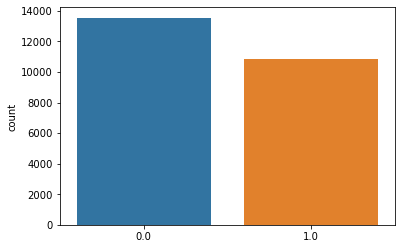

In [80]:
sns.countplot(data.is_goal.values)

In [81]:
data.is_goal.values

array([nan,  0.,  1., ...,  1.,  0.,  0.])

In [82]:
data.drop(["Unnamed: 0",  'remaining_min.1', 'power_of_shot.1','knockout_match.1', 'remaining_sec.1', 'distance_of_shot.1'], axis=1, inplace=True)

In [83]:
data.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,10.0,167.0,72.0,10.0,1.0,0.0,2000-01,27.0,38.0,NaN,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,1.0,"45.539131, -122.651648",shot - 30,NaN,20000012,1610612747
1,12.0,-157.0,0.0,10.0,1.0,0.0,2000-01,22.0,35.0,0.0,...,8-16 ft.,Manchester United,2000-10-31,MANU @ POR,2.0,"45.539131, -122.651648",shot - 45,NaN,20000012,1610612747
2,35.0,-101.0,135.0,7.0,1.0,0.0,2000-01,45.0,36.0,1.0,...,16-24 ft.,Manchester United,2000-10-31,NaN,3.0,"45.539131, -122.651648",shot - 25,NaN,20000012,1610612747
3,43.0,138.0,175.0,6.0,1.0,0.0,2000-01,52.0,42.0,0.0,...,16-24 ft.,Manchester United,2000-10-31,MANU @ POR,4.0,"45.539131, -122.651648",NaN,shot - 3,20000012,1610612747
4,155.0,0.0,0.0,NaN,2.0,0.0,2000-01,19.0,20.0,1.0,...,Less Than 8 ft.,NaN,2000-10-31,MANU @ POR,5.0,"45.539131, -122.651648",NaN,shot - 1,20000012,1610612747


In [84]:
data.date_of_game.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30697 entries, 0 to 30696
Series name: date_of_game
Non-Null Count  Dtype 
--------------  ----- 
29147 non-null  object
dtypes: object(1)
memory usage: 239.9+ KB


In [85]:
data['date_of_game'] = pd.to_datetime(data['date_of_game'])

In [86]:
data.date_of_game.info()

<class 'pandas.core.series.Series'>
RangeIndex: 30697 entries, 0 to 30696
Series name: date_of_game
Non-Null Count  Dtype         
--------------  -----         
29147 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 239.9 KB


In [87]:
season_unique = data.game_season.unique()

In [88]:
season_arange = np.arange(len(season_unique))

In [89]:
season_arange

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [90]:
data['game_season'] = data['game_season'].replace(season_unique, season_arange)

In [91]:
data.game_season.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [92]:
data.power_of_shot.fillna(data.power_of_shot.mean(), inplace= True)

In [93]:
data.power_of_shot.isnull().sum()

0

In [94]:
data.type_of_combined_shot.value_counts().keys()[0]

'shot - 3'

In [95]:
data.type_of_combined_shot.fillna(data.type_of_combined_shot.value_counts().keys()[0], inplace=True)

In [96]:
data.type_of_combined_shot.isnull().sum()

0

In [97]:
data.remaining_sec.fillna(data.remaining_sec.median(), inplace=True)

In [98]:
data.shot_id_number.shape[0]

30697

In [99]:
data['shot_id_number'] = pd.Series(np.arange(1, data.shot_id_number.shape[0]+1))

In [100]:
data['shot_id_number'].isnull().sum()

0

In [101]:
data['location_x'] = data.location_x.fillna(value=0)
data['location_y'] = data.location_y.fillna(value=0)

In [102]:
col = ['home/away','lat/lng', 'team_name','match_id','match_event_id', 'team_id', 'remaining_min', 'knockout_match',  'game_season' ]

data.loc[:, col] = data.loc[:, col].ffill()

In [103]:
data.isnull().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [104]:
data.shot_basics.unique()

array(['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot', nan,
       'Right Corner', 'Mid Ground Line', 'Left Corner'], dtype=object)

In [105]:
data.range_of_shot.unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.', nan,
       'Back Court Shot'], dtype=object)

In [106]:
data.loc[(data.range_of_shot == '16-24 ft.'), 'shot_basics'] = data[data.range_of_shot == '16-24 ft.'].shot_basics.fillna(value='Mid Range')

In [107]:
data.shot_basics.isnull().sum()

1157

In [108]:
data.loc[(data['range_of_shot']== 'Less Than 8 ft.') & (data.shot_basics.isnull()), 'shot_basics'] = pd.Series(data[(data['range_of_shot']=='Less Than 8 ft.')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Goal Area', 'Goal Line'],1,p=[0.7590347263095939, 0.24096527369040613])[0]))

In [109]:
data.loc[(data['range_of_shot']=='8-16 ft.')& data.shot_basics.isnull(), 'shot_basics'] = data[(data['range_of_shot']=='8-16 ft.')& data.shot_basics.isnull()].shot_basics.apply(lambda x: x if type(x) == str else np.random.choice(['Mid Range', 'Goal Line'],1,p=[0.6488754615642833, 0.35112453843571667])[0])

In [110]:
data.loc[(data.range_of_shot == '24+ ft.')&(data.shot_basics.isnull()), 'shot_basics']            =  pd.Series(data[(data.range_of_shot == '24+ ft.')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Penalty Spot', 'Right Corner', 'Left Corner'],1,p=[0.8932384341637011, 0.06192170818505338, 0.044839857651245554])[0]))

In [111]:
data.loc[(data.range_of_shot == 'Back Court Shot')&(data.shot_basics.isnull()), 'shot_basics']    =  pd.Series(data[(data.range_of_shot == 'Back Court Shot')&(data.shot_basics.isnull())].shot_basics.apply(lambda x: x if type(x)==str else np.random.choice(['Mid Ground Line', 'Penalty Spot'],1,p=[0.8441558441558441, 0.15584415584415584])[0]))

In [112]:
data.shot_basics.isna().sum()

66

In [113]:
data.shot_basics.fillna(method='ffill', inplace=True)
data.range_of_shot.fillna(method='ffill', inplace=True)

In [114]:
data.isnull().sum()

match_event_id               0
location_x                   0
location_y                   0
remaining_min                0
power_of_shot                0
knockout_match               0
game_season                  0
remaining_sec                0
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics                  0
range_of_shot                0
team_name                    0
date_of_game              1550
home/away                    0
shot_id_number               0
lat/lng                      0
type_of_shot             15280
type_of_combined_shot        0
match_id                     0
team_id                      0
dtype: int64

In [115]:
data.area_of_shot.fillna(value='Center(C)', inplace=True)

In [116]:
data.loc[data['distance_of_shot'].isnull(), 'distance_of_shot'] = data[data.distance_of_shot.isnull()].distance_of_shot.apply(lambda x: x if type(x)==str else np.random.choice([20,45,44,37],1,p=[0.5278056615137523,0.18630797028709095,0.14384661714515157,0.1420397510540052])[0] )

In [117]:
data.distance_of_shot.isnull().sum()

0

In [118]:
train = data[data.is_goal.notnull()]
print(train.shape)
train.set_index(np.arange(train.shape[0]), inplace=True)
train.tail()

(24429, 22)


,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
24424,382.0,0.0,0.0,11.0,4.0,1.0,20,4.0,20.0,0.0,...,Less Than 8 ft.,Manchester United,NaT,MANU vs. IND,30692,"42.982923, -71.446094",shot - 4,shot - 3,49900088,1610612747
24425,397.0,1.0,48.0,6.0,4.0,1.0,20,5.0,24.0,0.0,...,Less Than 8 ft.,Manchester United,2000-06-19,MANU vs. IND,30693,"42.982923, -71.446094",shot - 1,shot - 3,49900088,1610612747
24426,426.0,-134.0,166.0,3.0,4.0,1.0,20,28.0,41.0,1.0,...,16-24 ft.,Manchester United,2000-06-19,MANU vs. IND,30695,"42.982923, -71.446094",NaN,shot - 3,49900088,1610612747
24427,448.0,31.0,267.0,2.0,4.0,1.0,20,10.0,46.0,0.0,...,16-24 ft.,Manchester United,2000-06-19,MANU vs. IND,30696,"42.982923, -71.446094",shot - 26,shot - 3,49900088,1610612747
24428,471.0,1.0,0.0,0.0,4.0,1.0,20,39.0,27.0,0.0,...,Less Than 8 ft.,Manchester United,2000-06-19,MANU vs. IND,30697,"42.982923, -71.446094",shot - 45,shot - 3,49900088,1610612747


In [119]:
test = data[data.is_goal.isnull()]
print (test.shape)
test.set_index(np.arange(test.shape[0]), inplace=True)
test.tail()

(6268, 22)


,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
6263,218.0,-18.0,261.0,0.0,2.0,1.0,20,2.0,46.0,NaN,...,24+ ft.,Manchester United,2000-06-19,MANU vs. IND,30682,"42.982923, -71.446094",shot - 17,shot - 3,49900088,1610612747
6264,226.0,0.0,48.0,11.0,3.0,1.0,20,30.0,28.0,NaN,...,8-16 ft.,Manchester United,2000-06-19,MANU vs. IND,30683,"42.982923, -71.446094",shot - 44,shot - 3,49900088,1610612747
6265,268.0,16.0,93.0,5.0,3.0,1.0,1,37.0,29.0,NaN,...,8-16 ft.,Manchester United,2000-06-19,MANU vs. IND,30687,"42.982923, -71.446094",shot - 44,shot - 3,49900088,1610612747
6266,284.0,40.0,100.0,3.0,3.0,1.0,20,18.0,30.0,NaN,...,8-16 ft.,Manchester United,2000-06-19,MANU vs. IND,30688,"42.982923, -71.446094",shot - 54,shot - 3,49900088,1610612747
6267,398.0,0.0,0.0,6.0,4.0,1.0,20,5.0,20.0,NaN,...,Less Than 8 ft.,Manchester United,2000-06-19,MANU vs. IND,30694,"42.982923, -71.446094",shot - 49,shot - 3,49900088,1610612747


In [120]:
l_goals = train[(train.is_goal==1)].type_of_shot.value_counts().head(6).keys()
l_goals

Index(['shot - 4', 'shot - 39', 'shot - 44', 'shot - 36', 'shot - 15',
       'shot - 38'],
      dtype='object')

In [121]:
pgm_goal = train[train.is_goal==1].type_of_shot.value_counts().head(6).sum()
p_goal = (train[train.is_goal==1].type_of_shot.value_counts().head(6)/pgm_goal).tolist()
p_goal

[0.2682060390763766,
 0.19182948490230906,
 0.14653641207815277,
 0.1447602131438721,
 0.12966252220248667,
 0.11900532859680284]

In [122]:
p_goal

[0.2682060390763766,
 0.19182948490230906,
 0.14653641207815277,
 0.1447602131438721,
 0.12966252220248667,
 0.11900532859680284]

In [124]:
train.loc[(train.is_goal==1)&train.is_goal.isnull(), 'type_of_shot'] = train[(train.is_goal==1)&train.is_goal.isnull()].type_of_shot.apply(lambda x: x if type(x)==str else np.random.choice(l_goals,1,p=p_goal)[0])

In [126]:
train.is_goal.isnull().sum()

0

In [137]:
def label_encoder(data):
    for i in data.columns:
        if data[i].dtype=='O':
            unique = data[i].unique()
            arange = np.arange(len(unique))
            data[i].replace(unique, arange, inplace = True)
            data[i].astype('int')
            print (data[i])
            
            

In [138]:
label_encoder(train)

In [139]:
train.head()

,match_event_id,location_x,location_y,remaining_min,power_of_shot,knockout_match,game_season,remaining_sec,distance_of_shot,is_goal,...,range_of_shot,team_name,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,type_of_combined_shot,match_id,team_id
0,12.0,-157.0,0.0,10.0,1.0,0.0,0,22.0,35.0,0.0,...,0,0,2000-10-31,0,2,0,0,0,20000012,1610612747
1,35.0,-101.0,135.0,7.0,1.0,0.0,0,45.0,36.0,1.0,...,1,0,2000-10-31,0,3,0,1,0,20000012,1610612747
2,43.0,138.0,175.0,6.0,1.0,0.0,0,52.0,42.0,0.0,...,1,0,2000-10-31,0,4,0,2,0,20000012,1610612747
3,155.0,0.0,0.0,6.0,2.0,0.0,0,19.0,20.0,1.0,...,2,0,2000-10-31,0,5,0,2,1,20000012,1610612747
4,244.0,-145.0,-11.0,9.0,3.0,0.0,1,32.0,34.0,0.0,...,0,0,2000-10-31,0,6,0,3,0,20000012,1610612747


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 0 to 24428
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   match_event_id         24429 non-null  float64       
 1   location_x             24429 non-null  float64       
 2   location_y             24429 non-null  float64       
 3   remaining_min          24429 non-null  float64       
 4   power_of_shot          24429 non-null  float64       
 5   knockout_match         24429 non-null  float64       
 6   game_season            24429 non-null  int32         
 7   remaining_sec          24429 non-null  float64       
 8   distance_of_shot       24429 non-null  float64       
 9   is_goal                24429 non-null  float64       
 10  area_of_shot           24429 non-null  int32         
 11  shot_basics            24429 non-null  int32         
 12  range_of_shot          24429 non-null  int32         
 13  t

In [141]:
label_encoder(test)

0       0
1       1
2       1
3       1
4       0
       ..
6263    2
6264    3
6265    3
6266    3
6267    1
Name: shot_basics, Length: 6268, dtype: int32
0       0
1       1
2       1
3       1
4       0
       ..
6263    2
6264    3
6265    3
6266    3
6267    1
Name: range_of_shot, Length: 6268, dtype: int32
0       0
1       0
2       0
3       0
4       0
       ..
6263    0
6264    0
6265    0
6266    0
6267    0
Name: team_name, Length: 6268, dtype: int32
0        0
1        0
2        1
3        1
4        1
        ..
6263    14
6264    14
6265    14
6266    14
6267    14
Name: home/away, Length: 6268, dtype: int32
0       0
1       0
2       1
3       1
4       1
       ..
6263    1
6264    1
6265    1
6266    1
6267    1
Name: lat/lng, Length: 6268, dtype: int32
0        0
1        1
2        1
3        2
4        3
        ..
6263    37
6264    25
6265    25
6266    12
6267    15
Name: type_of_shot, Length: 6268, dtype: int32
0       0
1       0
2       1
3       0
4      

C:\Users\saran\AppData\Local\Temp\ipykernel_11300\3359911933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i].replace(unique, arange, inplace = True)
C:\Users\saran\AppData\Local\Temp\ipykernel_11300\3359911933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i].replace(unique, arange, inplace = True)
C:\Users\saran\AppData\Local\Temp\ipykernel_11300\3359911933.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6268 entries, 0 to 6267
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   match_event_id         6268 non-null   float64       
 1   location_x             6268 non-null   float64       
 2   location_y             6268 non-null   float64       
 3   remaining_min          6268 non-null   float64       
 4   power_of_shot          6268 non-null   float64       
 5   knockout_match         6268 non-null   float64       
 6   game_season            6268 non-null   int32         
 7   remaining_sec          6268 non-null   float64       
 8   distance_of_shot       6268 non-null   float64       
 9   is_goal                0 non-null      float64       
 10  area_of_shot           6268 non-null   int32         
 11  shot_basics            6268 non-null   int32         
 12  range_of_shot          6268 non-null   int32         
 13  tea

In [143]:
train.drop('date_of_game', axis=1, inplace=True)

C:\Users\saran\AppData\Local\Temp\ipykernel_11300\1226462426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('date_of_game', axis=1, inplace=True)


In [144]:
test.drop('date_of_game', axis=1, inplace=True)

C:\Users\saran\AppData\Local\Temp\ipykernel_11300\1695012402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('date_of_game', axis=1, inplace=True)


In [145]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24429 entries, 0 to 24428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_event_id         24429 non-null  float64
 1   location_x             24429 non-null  float64
 2   location_y             24429 non-null  float64
 3   remaining_min          24429 non-null  float64
 4   power_of_shot          24429 non-null  float64
 5   knockout_match         24429 non-null  float64
 6   game_season            24429 non-null  int32  
 7   remaining_sec          24429 non-null  float64
 8   distance_of_shot       24429 non-null  float64
 9   is_goal                24429 non-null  float64
 10  area_of_shot           24429 non-null  int32  
 11  shot_basics            24429 non-null  int32  
 12  range_of_shot          24429 non-null  int32  
 13  team_name              24429 non-null  int32  
 14  home/away              24429 non-null  int32  
 15  sh

In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6268 entries, 0 to 6267
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   match_event_id         6268 non-null   float64
 1   location_x             6268 non-null   float64
 2   location_y             6268 non-null   float64
 3   remaining_min          6268 non-null   float64
 4   power_of_shot          6268 non-null   float64
 5   knockout_match         6268 non-null   float64
 6   game_season            6268 non-null   int32  
 7   remaining_sec          6268 non-null   float64
 8   distance_of_shot       6268 non-null   float64
 9   is_goal                0 non-null      float64
 10  area_of_shot           6268 non-null   int32  
 11  shot_basics            6268 non-null   int32  
 12  range_of_shot          6268 non-null   int32  
 13  team_name              6268 non-null   int32  
 14  home/away              6268 non-null   int32  
 15  shot

In [147]:
y = train.is_goal

In [150]:
train.columns

Index(['match_event_id', 'location_x', 'location_y', 'remaining_min',
       'power_of_shot', 'knockout_match', 'game_season', 'remaining_sec',
       'distance_of_shot', 'area_of_shot', 'shot_basics', 'range_of_shot',
       'team_name', 'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id'],
      dtype='object')

In [151]:
test.drop('is_goal', axis=1, inplace=True)

C:\Users\saran\AppData\Local\Temp\ipykernel_11300\537747392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('is_goal', axis=1, inplace=True)
